In [ ]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 현재 경로 확인
!pwd

/content/drive/My Drive/Colab Notebooks


In [ ]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks'
/content/drive/My Drive/Colab Notebooks


# Variational AutoEncoder

## Reparametization trick

> 확률의 문제를 학습의 문제로 변형하기 위한 방법 <br> 
> 미분 가능한 식으로 변형하여 backpropagation이 가능하도록 변형한다

In [ ]:
import tensorflow as tf 
from tensorflow.keras import backend as K # backend(tensorflow)에 맞추어 low level 데이터 연산을 해주는 라이브러리 
import inspect

In [ ]:
print(inspect.getsource(K.random_normal)) # 정규분포로 부터 무작위 샘플을 추출 하는 함수 

@keras_export('keras.backend.random_normal')
@tf.__internal__.dispatch.add_dispatch_support
@doc_controls.do_not_generate_docs
def random_normal(shape, mean=0.0, stddev=1.0, dtype=None, seed=None):
  """Returns a tensor with normal distribution of values.

  It is an alias to `tf.random.normal`.

  Args:
      shape: A tuple of integers, the shape of tensor to create.
      mean: A float, the mean value of the normal distribution to draw samples.
        Default to 0.0.
      stddev: A float, the standard deviation of the normal distribution
        to draw samples. Default to 1.0.
      dtype: `tf.dtypes.DType`, dtype of returned tensor. Default to use Keras
        backend dtype which is float32.
      seed: Integer, random seed. Will use a random numpy integer when not
        specified.

  Returns:
      A tensor with normal distribution of values.

  Example:

  >>> random_normal_tensor = tf.keras.backend.random_normal(shape=(2,3),
  ... mean=0.0, stddev=1.0)
  >>> random_normal_t

In [ ]:
tf.keras.losses.kl_divergence

<function keras.losses.kl_divergence(y_true, y_pred)>

In [ ]:
K.random_normal((2,3))

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-0.03670657,  0.19654608,  1.8087223 ],
       [-0.5491878 , -1.7109    ,  0.6098757 ]], dtype=float32)>

In [ ]:
epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0, stddev=0.1)

```
random normal 자체는 미분이 가능하지만 random normal 결과는 미분가능하지 않기 때문에 파라미터화 해야 한다 
```

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

## Regularizer term

> Regularizer term은 λ또는 Regularization Parameter라고도 부른다 <br>
> Regularizer term은 급격한 변화를 방지하는 역할을 한다. 결국 일반화 된 모델이 만들어지도록 유도한다

```
Lasso 
- L1-norm 패널티를 가진 선형 회귀 방법, overfitting을 방지하는 방법이다 
Ridge 
- L2-norm 패널티를 가진 선형 회귀 방법, overfitting을 방지하는 방법이다 
ElasticNet L1, L2
- L1-norm, L2-norm 패널티를 동시에 가진 선형 회귀 방법, overfitting을 방지하는 방법이다 
```

### Lasso

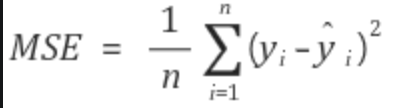

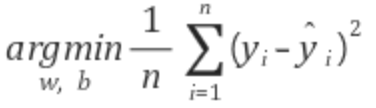

> MSE를 최소로 만드는 w,b 찾기

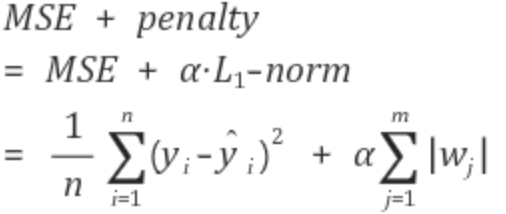

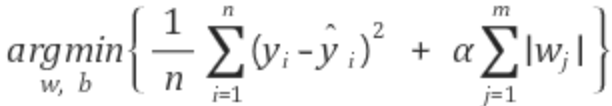

> MSE + penalty를 최소로 만드는 w, b 찾기

```
MSE와 penalty를 최소가 되는 w와 b를 찾는 것이 핵심이다 
이는 w의 모든 원소가 0이되거나 0에 가깝게 되야한다는 의미이다 
그렇다면 어떤 특성들은 모델을 만들때 사용하지 않게 된다 
모델을 만들때 모든 가중치를 고려하게 된다면 복잡한 모델이 만들어지고 그만큼 학습 데이터에만 잘 학습된 
즉, overfitting이 된 모델이 탄생하게 될 것이다 

따라서 penalty를 추가함으로써 자연스럽게 학습과정에서 덜 중요한 특징들은 사용되지 않게 적절한 특징을 
추려내는 것이 관건이다 
예를 들어 100개 특성을 갖는 회귀 모델일 있다고 가정할 때 α=1로 설정했더니 95개가 0이 되면서 5개의 특성이 사용된 것을 확인 했다. 이때 성능 측정을 했더니 underfitting이 발생했다
그런데 α=0.0001로 설정했더니 5개만 0이 되면서 95개 특성을 사용해야 했다. 이때 성능 측정을 했더니 overfitting이 발생했다
결국 α=0.1로 설정하여 70개 특성이 0이 되면서 30개 특성을 사용하여 성능 측정을 했더니 적절하게 일반화 된 모델을 만들 수 있게 되었다 
이때 이 α를 구할 수 있도록 파라미터가 추가 된 것은 L1-norm penalty를 추가했기 때문에 가능한 일이다
```

## Ridge

```
Ridge는 L1-norm 대신 L2-norm을 사용한 Regulaization 방법이라고 생각하면 된다 
Lasso와 차이점이 있다면 가중치가 0에 가까워질 뿐 0이 되지는 않는다 
왜냐 하면 Ridge는 절대값을 추가한 것이 아니라 제곱합이기 때문에 0이 되지 않는다

따라서 특성의 중요도가 전체적으로 비슷한 경우 Ridge가 좀 더 괜찮은 모델을 찾아줄 것이다
```

In [ ]:
layer = tf.keras.layers.Dense(
    5, input_dim=5,
    kernel_initializer='ones',
    kernel_regularizer=tf.keras.regularizers.L1(0.01)
)

In [ ]:
layer.weights

[]

In [ ]:
layer.build((None,5))

In [ ]:
layer.weights

[<tf.Variable 'kernel:0' shape=(5, 5) dtype=float32, numpy=
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=float32)>,
 <tf.Variable 'bias:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>]

In [ ]:
tensor = tf.ones(shape=(5,5))*2.0

In [ ]:
tensor

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]], dtype=float32)>

In [ ]:
out = layer(tensor)

In [ ]:
out

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10.]], dtype=float32)>

### Regularizer / penalty

```
각 항의 계수를 작게 만들어 가설함수를 간단하게 하고 과적합을 피할수 있도록 유도한다

loss = loss + regulizer_term(L1, L2) 
```

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
y_train = tf.cast(y_train, tf.int32)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu', kernel_regularizer=tf.keras.regularizers.l1()),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [ ]:
prediction = model(X_train)

In [ ]:
model.losses # regularizer를 반환한다

[<tf.Tensor: shape=(), dtype=float32, numpy=40.870396>]

In [ ]:
# loss + Regularization term / overfitting은 덜 나지만 학습속도는 느려진다
loss(y_train, prediction) + tf.reduce_sum(model.losses) 

<tf.Tensor: shape=(), dtype=float32, numpy=164.54881>

### loss function의 차이

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
y_train = tf.cast(y_train, tf.int32)
y_train_ohe = tf.keras.utils.to_categorical(y_train)

In [ ]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu', kernel_regularizer=tf.keras.regularizers.l1()),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
prediction = model1(X_train)

In [ ]:
tf.keras.losses.sparse_categorical_crossentropy(y_train, prediction)
# tf.keras.losses.SparseCategoricalCrossentropy()(y_train, prediction)
# tf.nn.sparse_softmax_cross_entropy_with_logits(y_train, prediction)

<tf.Tensor: shape=(60000,), dtype=float32, numpy=
array([192.52524 ,  51.914566,  72.927284, ..., 171.85602 , 150.09734 ,
        53.307495], dtype=float32)>

In [ ]:
# tf.keras.losses.sparse_categorical_crossentropy(y_train, prediction)
tf.keras.losses.SparseCategoricalCrossentropy()(y_train, prediction)
# tf.nn.sparse_softmax_cross_entropy_with_logits(y_train, prediction)

<tf.Tensor: shape=(), dtype=float32, numpy=116.44715>

In [ ]:
# tf.keras.losses.sparse_categorical_crossentropy(y_train, prediction)
# tf.keras.losses.SparseCategoricalCrossentropy()(y_train, prediction)
tf.nn.sparse_softmax_cross_entropy_with_logits(y_train, prediction)

<tf.Tensor: shape=(60000,), dtype=float32, numpy=
array([2.46115  , 2.46115  , 2.46115  , ..., 2.46115  , 2.46115  ,
       2.4379332], dtype=float32)>

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu', kernel_regularizer=tf.keras.regularizers.l1()),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])
prediction = model2(X_train)

In [ ]:
tf.keras.losses.sparse_categorical_crossentropy(y_train, prediction)
# tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)(y_train, prediction)
# tf.nn.sparse_softmax_cross_entropy_with_logits(y_train, prediction)

<tf.Tensor: shape=(60000,), dtype=float32, numpy=
array([17.216707 , 17.727533 ,  1.6094378, ...,  1.0986124,  1.0986124,
       17.216707 ], dtype=float32)>

In [ ]:
# tf.keras.losses.sparse_categorical_crossentropy(y_train, prediction)
tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)(y_train, prediction)
# tf.nn.sparse_softmax_cross_entropy_with_logits(y_train, prediction)

<tf.Tensor: shape=(), dtype=float32, numpy=151.73372>

In [ ]:
# tf.keras.losses.sparse_categorical_crossentropy(y_train, prediction)
# tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)(y_train, prediction)
tf.nn.sparse_softmax_cross_entropy_with_logits(y_train, prediction)

<tf.Tensor: shape=(60000,), dtype=float32, numpy=
array([114.73    , 230.42961 , 114.96562 , ...,  13.309306,  -0.      ,
       137.89368 ], dtype=float32)>

In [ ]:
# model1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy)
# model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy())
model1.compile(loss=tf.nn.sparse_softmax_cross_entropy_with_logits)
# model1.compile(loss=tf.nn.softmax_cross_entropy_with_logits) 

In [ ]:
# model2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy)
# model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy())
model2.compile(loss=tf.nn.sparse_softmax_cross_entropy_with_logits)
# model2.compile(loss=tf.nn.softmax_cross_entropy_with_logits) 

In [ ]:
model1.fit(X_train, y_train, epochs=2) # sparse_categorical_crossentropy

2021-11-02 15:59:12.522765: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-02 15:59:12.527036: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-02 15:59:12.647707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/2
1875/1875 [==============================] - 6s 3ms/step - loss: 9.0639
Epoch 2/2
1875/1875 [==============================] - 6s 3ms/step - loss: 3.7299


In [ ]:
model1.fit(X_train, y_train, epochs=2) # SparseCategoricalCrossentropy

Epoch 1/2
  32/1875 [..............................] - ETA: 6s - loss: 6.2577 

2021-11-02 15:59:28.287200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 6s 3ms/step - loss: 3.1716
Epoch 2/2
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5536


In [ ]:
model1.fit(X_train, y_train_ohe, epochs=2) # nn.sparse_softmax_cross_entropy_with_logits

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
model1.fit(X_train, y_train, epochs=2) # nn.softmax_cross_entropy_with_logits

Epoch 1/2
  18/1875 [..............................] - ETA: 12s - loss: 97.9138 

2021-11-02 16:00:26.691468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 103.1872
Epoch 2/2
1875/1875 [==============================] - 9s 5ms/step - loss: 103.0049


In [ ]:
model2.fit(X_train, y_train_ohe, epochs=2) # nn.softmax_cross_entropy_with_logits (with softmax)

Epoch 1/2
  21/1875 [..............................] - ETA: 9s - loss: 91.7908  

2021-11-02 16:20:28.216625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 8.9059
Epoch 2/2
1875/1875 [==============================] - 8s 4ms/step - loss: 3.7517


In [ ]:
model2.fit(X_train, y_train_ohe, epochs=2) # nn.sparse_softmax_cross_entropy_with_logits

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

```
One-hot encoding x => sparse O
One-hot encoding O => Sparse X
```

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(3,3),
    tf.keras.layers.Conv2D(1,3)
])

In [ ]:
model(X_train, apply_sigmoid=True)

ValueError: Input 0 of layer sequential_38 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (60000, 28, 28)

In [ ]:
tensor = tf.ones(shape)

In [ ]:
out = layer(tensor, apply_sigmoid=True)